In [66]:
from sklearn import svm, cross_validation, grid_search
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score

In [68]:
df=pd.read_csv("dataset/agaricus-lepiota.data", header=None)

In [69]:
df.columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
             'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
             'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
             'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']

In [70]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surf-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [71]:
print(df['class'].value_counts())

e    4208
p    3916
Name: class, dtype: int64


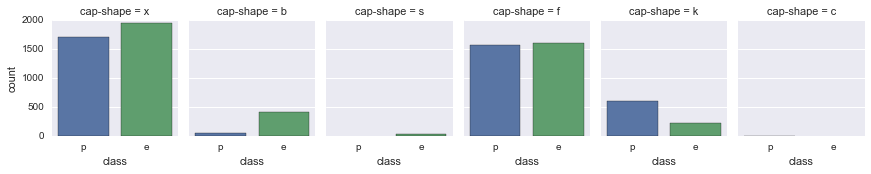

In [72]:
# Edibility by Mushroom Cap Shape
df_forplot = df.loc[:,('class','cap-shape','gill-color')]
g = sns.factorplot("class", col="cap-shape", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

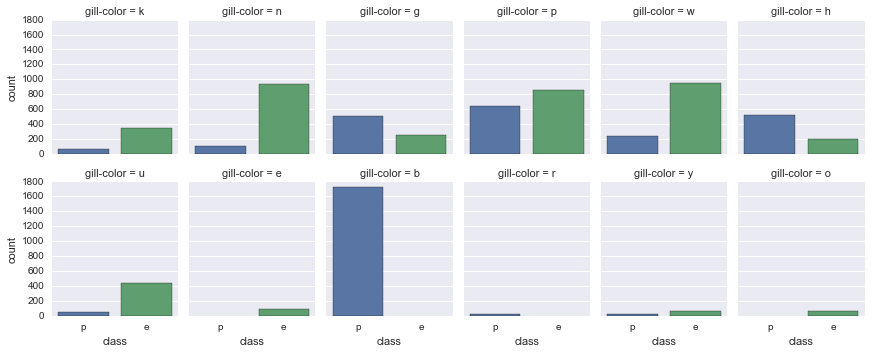

In [73]:
# Edibility by Mushroom Gill Color
g = sns.factorplot("class", col="gill-color", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

In [74]:
#put the features into X (everything except the 0th column)
X = pd.DataFrame(df, columns=df.columns[1:len(df.columns)], index=df.index)
#put the class values (0th column) into Y 
Y = df['class']

In [75]:
#encode the text category labels as numeric
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
y_encoded = le.transform(Y)


x_encoded = pd.DataFrame(X,columns=[X.columns[0]])
for colname in X.columns:
    le.fit(X[colname])
    print(colname, le.classes_)
    x_encoded[colname] = le.transform(X[colname])

cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surf-above-ring ['f' 'k' 's' 'y']
stalk-surf-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [15]:
x_encoded.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surf-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [16]:
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [58]:
# grid search実行
parameters = {'C':np.logspace(-4, 4, 9), 'kernel':('linear', 'rbf', 'poly')}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters, n_jobs = -1)
# clf = grid_search.GridSearchCV(svr, parameters, n_jobs = -1) n_job:並列するCPUで-1は自動割当
# clf = grid_search.GridSearchCV(svr, parameters, cv=5) cv:k-foldのk
# clf = grid_search.GridSearchCV(svr, parameters, scoring=precision) サーチで最適化する値(accuracy(デフォルト),precision,recallなど)

clf.fit(x_encoded, y_encoded)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04]), 'kernel': ('linear', 'rbf', 'poly')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
# ベストパラメタ
clf.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
clf.grid_scores_

[mean: 0.80441, std: 0.09838, params: {'C': 0.0001, 'kernel': 'linear'},
 mean: 0.51797, std: 0.00009, params: {'C': 0.0001, 'kernel': 'rbf'},
 mean: 0.77154, std: 0.08203, params: {'C': 0.0001, 'kernel': 'poly'},
 mean: 0.82065, std: 0.03626, params: {'C': 0.001, 'kernel': 'linear'},
 mean: 0.51945, std: 0.00204, params: {'C': 0.001, 'kernel': 'rbf'},
 mean: 0.76859, std: 0.10099, params: {'C': 0.001, 'kernel': 'poly'},
 mean: 0.78077, std: 0.07573, params: {'C': 0.01, 'kernel': 'linear'},
 mean: 0.78016, std: 0.04323, params: {'C': 0.01, 'kernel': 'rbf'},
 mean: 0.82804, std: 0.10134, params: {'C': 0.01, 'kernel': 'poly'},
 mean: 0.80490, std: 0.08232, params: {'C': 0.10000000000000001, 'kernel': 'linear'},
 mean: 0.78163, std: 0.10070, params: {'C': 0.10000000000000001, 'kernel': 'rbf'},
 mean: 0.86091, std: 0.12043, params: {'C': 0.10000000000000001, 'kernel': 'poly'},
 mean: 0.82509, std: 0.08062, params: {'C': 1.0, 'kernel': 'linear'},
 mean: 0.84540, std: 0.09858, params: {'C': 

In [61]:
# グリッドサーチした結果で平均値の降順で列挙(accuracy)
# http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html
from operator import itemgetter
n_top=5
top_scores = sorted(clf.grid_scores_, key=itemgetter(1), reverse=True)[:n_top]
for i, score in enumerate(top_scores):
    print("Model with rank: {0}".format(i + 1))
    print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
          score.mean_validation_score,
          np.std(score.cv_validation_scores)))
    print("Parameters: {0}".format(score.parameters))
    print("")

Model with rank: 1
Mean validation score: 0.874 (std: 0.046)
Parameters: {'C': 100.0, 'kernel': 'linear'}

Model with rank: 2
Mean validation score: 0.874 (std: 0.046)
Parameters: {'C': 1000.0, 'kernel': 'linear'}

Model with rank: 3
Mean validation score: 0.874 (std: 0.046)
Parameters: {'C': 10000.0, 'kernel': 'linear'}

Model with rank: 4
Mean validation score: 0.861 (std: 0.120)
Parameters: {'C': 1.0, 'kernel': 'poly'}

Model with rank: 5
Mean validation score: 0.861 (std: 0.120)
Parameters: {'C': 10.0, 'kernel': 'poly'}



In [62]:
for params, mean_score, all_scores in clf.grid_scores_:
    print("{:.3f} (+/- {:.3f}) for {}".format(mean_score, all_scores.std() / 2, params))

0.804 (+/- 0.049) for {'C': 0.0001, 'kernel': 'linear'}
0.518 (+/- 0.000) for {'C': 0.0001, 'kernel': 'rbf'}
0.772 (+/- 0.041) for {'C': 0.0001, 'kernel': 'poly'}
0.821 (+/- 0.018) for {'C': 0.001, 'kernel': 'linear'}
0.519 (+/- 0.001) for {'C': 0.001, 'kernel': 'rbf'}
0.769 (+/- 0.050) for {'C': 0.001, 'kernel': 'poly'}
0.781 (+/- 0.038) for {'C': 0.01, 'kernel': 'linear'}
0.780 (+/- 0.022) for {'C': 0.01, 'kernel': 'rbf'}
0.828 (+/- 0.051) for {'C': 0.01, 'kernel': 'poly'}
0.805 (+/- 0.041) for {'C': 0.10000000000000001, 'kernel': 'linear'}
0.782 (+/- 0.050) for {'C': 0.10000000000000001, 'kernel': 'rbf'}
0.861 (+/- 0.060) for {'C': 0.10000000000000001, 'kernel': 'poly'}
0.825 (+/- 0.040) for {'C': 1.0, 'kernel': 'linear'}
0.845 (+/- 0.049) for {'C': 1.0, 'kernel': 'rbf'}
0.861 (+/- 0.060) for {'C': 1.0, 'kernel': 'poly'}
0.846 (+/- 0.020) for {'C': 10.0, 'kernel': 'linear'}
0.858 (+/- 0.055) for {'C': 10.0, 'kernel': 'rbf'}
0.861 (+/- 0.060) for {'C': 10.0, 'kernel': 'poly'}
0.874 (

In [81]:
x_encoded

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surf-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,3,3


In [ ]:
# mushroomデータセットでは意外にlinear kernelがよさそう

In [ ]:
# 公式document 関連する部分
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# http://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
# その他
# mushroomデータをナイーブベイズで: https://github.com/paix120/DataScienceLearningClubActivities/blob/master/Activity05/Mushroom%20Edibility%20Classification%20-%20Naive%20Bayes.ipynb
# データセット: https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/

# SVM, grid search
# http://may46onez.hatenablog.com/entry/2016/02/19/152532

# Scikit-learnでハイパーパラメータのグリッドサーチ(qiita)
# http://qiita.com/sotetsuk/items/16ffd76978085bfd7628

# svm grid-search
# http://may46onez.hatenablog.com/entry/2016/02/19/152532

# SVM cross-validation grid-search(qiita)
# http://qiita.com/Lewuathe/items/09d07d3ff366e0dd6b24
